# Storytelling Data Visualization on Exchange Rates

In this project we will create a storytelling data visualization about the Euro daily exchange rates between 1999 and 2021. The  dataset used here can be downloaded on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020).

Let's start with importing the libraries necessary and exploring our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
print(exchange_rates.head(5))
print(exchange_rates.tail(5))
print(exchange_rates.info())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

### Data Cleaning

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

Isolate the Time and US_dollar columns

In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

In [6]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
1.0424     1
1.1633     1
1.3694     1
1.5019     1
0.9955     1
Name: US_dollar, Length: 3528, dtype: int64

Drop rows with "-" character.

In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"] != "-"]

Convert the US_dollar column to float data type.

In [8]:
euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype(float)
print(euro_to_dollar.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB
None


### Rolling Mean

In [9]:
euro_to_dollar["rolling_mean"] = euro_to_dollar["US_dollar"].rolling(30).mean()

In [10]:
print(euro_to_dollar.head(50))

         Time  US_dollar  rolling_mean
0  1999-01-04     1.1789           NaN
1  1999-01-05     1.1790           NaN
2  1999-01-06     1.1743           NaN
3  1999-01-07     1.1632           NaN
4  1999-01-08     1.1659           NaN
5  1999-01-11     1.1569           NaN
6  1999-01-12     1.1520           NaN
7  1999-01-13     1.1744           NaN
8  1999-01-14     1.1653           NaN
9  1999-01-15     1.1626           NaN
10 1999-01-18     1.1612           NaN
11 1999-01-19     1.1616           NaN
12 1999-01-20     1.1575           NaN
13 1999-01-21     1.1572           NaN
14 1999-01-22     1.1567           NaN
15 1999-01-25     1.1584           NaN
16 1999-01-26     1.1582           NaN
17 1999-01-27     1.1529           NaN
18 1999-01-28     1.1410           NaN
19 1999-01-29     1.1384           NaN
20 1999-02-01     1.1338           NaN
21 1999-02-02     1.1337           NaN
22 1999-02-03     1.1337           NaN
23 1999-02-04     1.1263           NaN
24 1999-02-05     1.1292 

### Coming up with an Idea

We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

### Graph

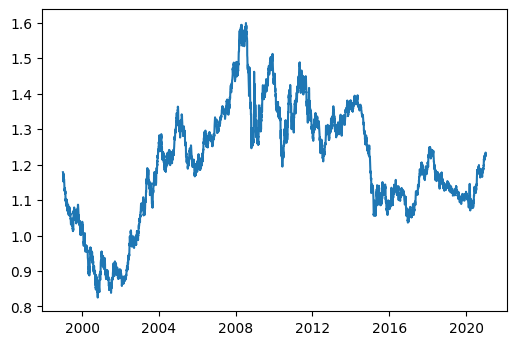

In [11]:

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

### Three US Presidencies

In [14]:
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

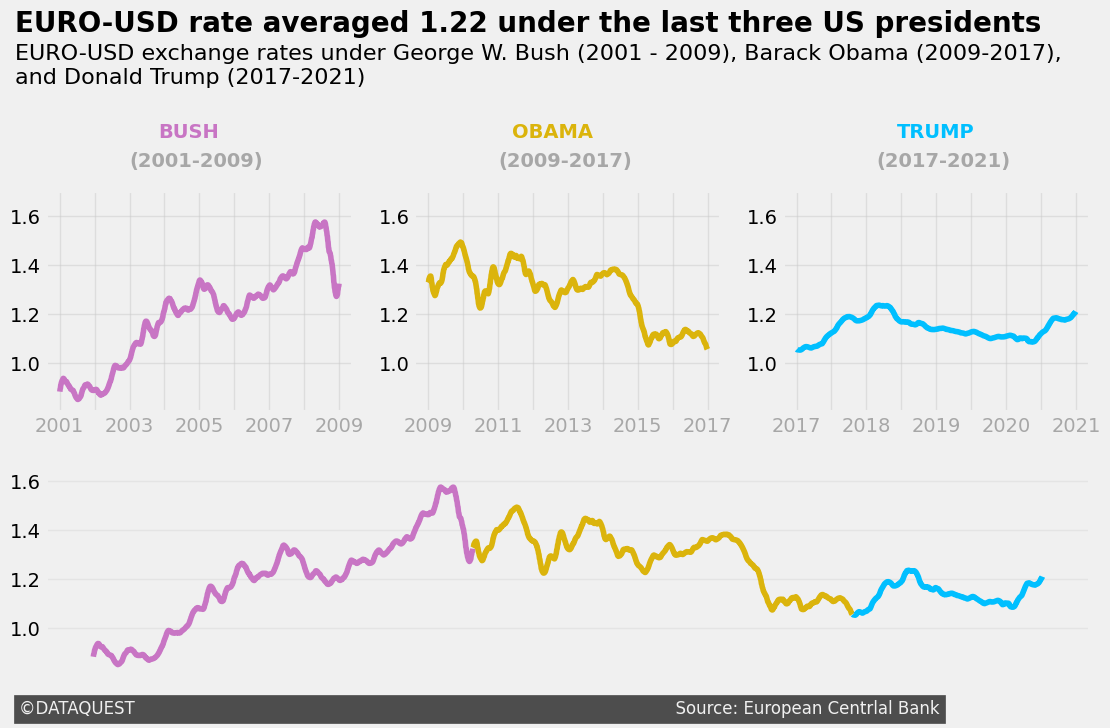

In [19]:
style.use('fivethirtyeight')

#subplots
plt.figure(figsize = (12, 6))

ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)

axes =  (ax1, ax2, ax3, ax4)

#adapting all subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'])
    ax.grid(alpha=0.5)    

# Bush   
ax1.plot(bush["Time"], bush["rolling_mean"], color='#C875C4')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', color='#C875C4', weight='bold')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold', alpha=0.3)

# Obama
ax2.plot(obama["Time"], obama["rolling_mean"], color='#DBB40C')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', color='#DBB40C', weight='bold')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold', alpha=0.3)

#Trump
ax3.plot(trump["Time"], trump["rolling_mean"], color='deepskyblue')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'], alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', color='deepskyblue', weight='bold')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold', alpha=0.3)

#all three presidents
ax4.plot(bush["Time"], bush["rolling_mean"], color='#C875C4')
ax4.plot(obama["Time"], obama["rolling_mean"], color='#DBB40C')
ax4.plot(trump["Time"], trump["rolling_mean"], color='deepskyblue')
ax.grid(alpha=0.3)
ax.set_xticks([])

#title and subtitle
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

#signature
ax4.text(729916.0, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Centrlal Bank', color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=12)

plt.show()